In [93]:
import requests
import pandas as pd
import panel as pn
import hvplot.pandas
pn.extension('plotly')
import yfinance as yf
from dotenv import load_dotenv
import numpy as np
import alpaca_trade_api as tradeapi
from pathlib import Path
from MCForecastTools import MCSimulation
%matplotlib inline

**What if I added Bitcoin to my portfolio?**

Should a 30 year old Torontonian allocate part of his $10000.00 'downpayment' fund toward Bitcoin?

- Pulling price data for our proxy securities

In [94]:
data = yf.download("VOO QQQ XLE IWM DJI XLF DXY DJT GSG AGG GLD BTC-USD", start="2015-01-01",
                    end="2021-12-31", group_by='tickers')


[*********************100%***********************]  12 of 12 completed


In [95]:
data.dropna(inplace = True)
data = data[sorted(data.columns)]
data = data.rename(columns=str.lower)
data.head()

agg                                                  \
            adj close       close        high         low        open   
Date                                                                    
2015-01-07  93.861282  110.930000  111.040001  110.739998  111.000000   
2015-01-08  93.717461  110.760002  110.839996  110.629997  110.839996   
2015-01-12  94.022049  111.120003  111.260002  111.080002  111.160004   
2015-01-15  94.707451  111.930000  111.940002  111.489998  111.489998   
2015-01-16  94.343590  111.500000  111.830002  111.419998  111.680000   

                          btc-usd                                      ...  \
               volume   adj close       close        high         low  ...   
Date                                                                   ...   
2015-01-07  3984400.0  294.337006  294.337006  298.753998  283.079010  ...   
2015-01-08  2212200.0  283.348999  283.348999  294.135010  282.174988  ...   
2015-01-12  2185700.0  267.795990  267.795990  272.203003  265.200012  ...   
2015-01-15  2084000.0  209.843994  209.843994  229.067001  176.897003  ...   
2015-01-16  2744500.0  208.097000  208.097000  221.591003  199.770996  ...   

                  xle                                          xlf             \
                 high        low       open      volume  adj close      close   
Date                                                                            
2015-01-07  76.360001  74.779999  76.029999  31192400.0  17.072645  19.569456   
2015-01-08  77.150002  75.580002  75.889999  28186900.0  17.327778  19.861900   
2015-01-12  75.389999  73.760002  75.389999  28940600.0  16.952171  19.431356   
2015-01-15  74.860001  72.800003  74.669998  41346000.0  16.448984  18.854589   
2015-01-16  75.330002  73.230003  73.290001  42741900.0  16.647423  19.082047   

                                                         
                 high        low       open      volume  
Date                                                     
2015-01-07  19.618196  19.415110  19.528837  36287049.0  
2015-01-08  19.910643  19.756296  19.796913  37995923.0  
2015-01-12  19.642567  19.374493  19.593826  38356360.0  
2015-01-15  19.122665  18.822096  19.025183  58038203.0  
2015-01-16  19.090172  18.732738  18.805849  89499855.0  

[5 rows x 72 columns]

**Portfolio weightings**

Importing our portfolios allocation information

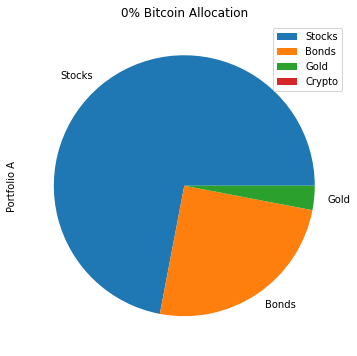

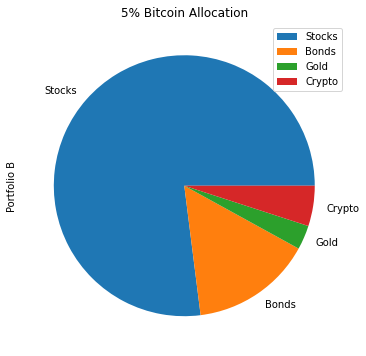

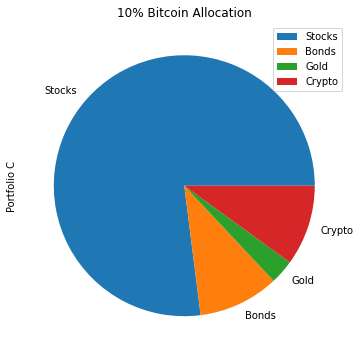

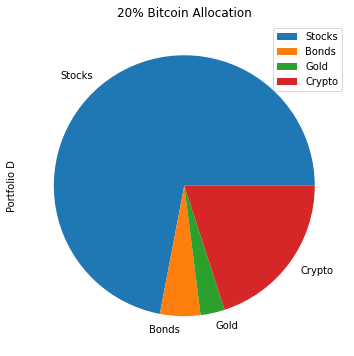

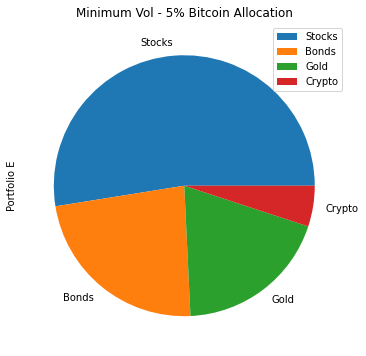

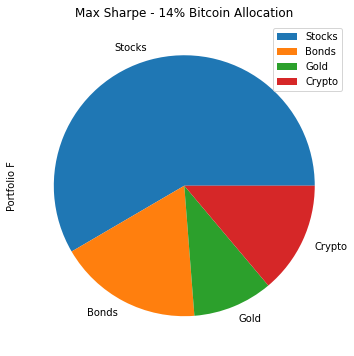

In [97]:
portfolios_path=Path('Portfolio allocations.csv')

portfolios_allocation = pd.read_csv(portfolios_path)

portfolios_allocation.rename(columns={"Unnamed: 0":"Asset Classes"}, inplace=True)

portfolio_a_allocation=portfolios_allocation.drop(columns=["Portfolio B", 
                       "Portfolio C", "Portfolio D", "Portfolio E","Portfolio F"]).drop([0], axis=0)

portfolio_b_allocation=portfolios_allocation.drop(columns=["Portfolio A", 
                       "Portfolio C", "Portfolio D", "Portfolio E","Portfolio F"]).drop([0], axis=0)

portfolio_c_allocation=portfolios_allocation.drop(columns=["Portfolio B", 
                       "Portfolio A", "Portfolio D", "Portfolio E","Portfolio F"]).drop([0], axis=0)

portfolio_d_allocation=portfolios_allocation.drop(columns=["Portfolio B", 
                       "Portfolio C", "Portfolio A", "Portfolio E","Portfolio F"]).drop([0], axis=0)

portfolio_e_allocation=portfolios_allocation.drop(columns=["Portfolio B", 
                       "Portfolio C", "Portfolio D","Portfolio A", "Portfolio F"]).drop([0], axis=0)

portfolio_f_allocation=portfolios_allocation.drop(columns=["Portfolio A", 
                       "Portfolio B", "Portfolio C","Portfolio D","Portfolio E"]).drop([0], axis=0)


plot_portfolio_a= portfolio_a_allocation.plot(title= "0% Bitcoin Allocation", kind="pie", labels=portfolio_a_allocation["Asset Classes"], y="Portfolio A", figsize=(6,6))

plot_portfolio_b= portfolio_b_allocation.plot(title= "5% Bitcoin Allocation", kind="pie", labels=portfolio_b_allocation["Asset Classes"], y="Portfolio B", figsize=(6,6))

plot_portfolio_c= portfolio_c_allocation.plot(title= "10% Bitcoin Allocation", kind="pie", labels=portfolio_c_allocation["Asset Classes"], y="Portfolio C", figsize=(6,6))

plot_portfolio_d= portfolio_d_allocation.plot(title= "20% Bitcoin Allocation", kind="pie", labels=portfolio_d_allocation["Asset Classes"], y="Portfolio D", figsize=(6,6))

plot_portfolio_e= portfolio_e_allocation.plot(title= "Minimum Vol - 5% Bitcoin Allocation", kind="pie", labels=portfolio_e_allocation["Asset Classes"], y="Portfolio E", figsize=(6,6))

lot_portfolio_f= portfolio_f_allocation.plot(title= "Max Sharpe - 14% Bitcoin Allocation", kind="pie", labels=portfolio_f_allocation["Asset Classes"], y="Portfolio F", figsize=(6,6))


# tabs=pn.Tabs(("Portfolios", (pn.Column(plot_portfolio_a,plot_portfolio_b,plot_portfolio_c, plot_portfolio_d))))

# tabs

Portfolio A weights

In [78]:
a=[0.25,0.00,0.05,0.00,.20,0.03,.00,0.07,0.10,0.10,0.10,0.10]
sum(a)

1.0

Portfolio B weights

In [79]:
b=[0.15,0.05,0.05,0.05,.10,0.03,.05,0.05,0.20,0.12,0.10,0.05]
sum(b)

1.0

Portfolio C weights

In [80]:
c=[0.10,0.10,0.05,0.06,.05,0.03,0.06,0.05,0.15,0.15,0.10,0.10]
sum(c)

1.0

Portfolio D weights

In [81]:
d=[0.05,0.20,0.05,0.06,.00,0.03,.06,0.05,0.15,0.15,0.10,0.10]
sum(d)

1.0

Minimum Volatility - Portfolio E

In [99]:
e=[0.01934,0.00856	,0.040763	,0.022159	,0.010599	,0.059309	,0.039438	,0.158348	,0.164533	,0.229193	,0.193615	,0.054143]
sum(e)

1.0

Maximum Sharpe - Portfolio F

In [100]:
f=[0.027132	, 0.147633	, 0.008997	, 0.018485	, 0.099116	, 0.19085	, 0.009965	,0.080963	, 0.002391	, 0.180419	,0.097614	, 0.136435]
sum(f)

1.0

**Historical daily closing values for each portfolio**

- We isolate the daily historical returns for each security

In [101]:
portfolio= pd.DataFrame(pd.concat([data["agg"]["close"],data["btc-usd"]["close"],
                                   data["dji"]["close"],data["djt"]["close"], data["dxy"]["close"], 
                                   data["gld"]["close"],data["gsg"]["close"], data["iwm"]["close"], 
                                   data["qqq"]["close"],data["voo"]["close"],data["xle"]["close"],
                                   data["xlf"]["close"]],axis=1,join="inner").pct_change())

portfolio.dropna(inplace=True)

- Calculate each portfolio's changing daily values via a predefined function

In [102]:
def portfolio_weighted_avg_values(securities_daily_returns, portfolio_weights):
      
    portfolio_wavg_value=pd.DataFrame(securities_daily_returns.dot(portfolio_weights))
    
    portfolio_wavg_value.set_axis(["close"],axis=1, inplace=True)
    
    portfolio_wavg_value=(1 + portfolio_wavg_value).cumprod()*10000
    
    return portfolio_wavg_value


In [103]:
portfolio_a= portfolio_weighted_avg_values(portfolio,a)

portfolio_b= portfolio_weighted_avg_values(portfolio,b)

portfolio_c= portfolio_weighted_avg_values(portfolio,c)

portfolio_d= portfolio_weighted_avg_values(portfolio,d)

portfolio_e= portfolio_weighted_avg_values(portfolio,e)

portfolio_f= portfolio_weighted_avg_values(portfolio,f)


- Add a multiindex to each portfolios' daily changing values dataframe so that we can run the MC simulations

In [104]:
df_a=portfolio_a
columns_a=[('portfolio a','close')]
df_a.columns=pd.MultiIndex.from_tuples(columns_a)

df_b=portfolio_b
columns_b=[('portfolio b','close')]
df_b.columns=pd.MultiIndex.from_tuples(columns_b)

df_c=portfolio_c
columns_c=[('portfolio c','close')]
df_c.columns=pd.MultiIndex.from_tuples(columns_c)

df_d=portfolio_d
columns_d=[('portfolio d','close')]
df_d.columns=pd.MultiIndex.from_tuples(columns_d)

df_e=portfolio_e
columns_e=[('portfolio e','close')]
df_e.columns=pd.MultiIndex.from_tuples(columns_e)

df_f=portfolio_f
columns_f=[('portfolio f','close')]
df_f.columns=pd.MultiIndex.from_tuples(columns_f)

- Run a MonteCarlo simulation for each portfolio

In [105]:
MC_portfolio_a = MCSimulation(portfolio_data = df_a, num_simulation = 100, num_trading_days = 252*5)

MC_portfolio_b = MCSimulation(portfolio_data = df_b, num_simulation = 100, num_trading_days = 252*5)

MC_portfolio_c = MCSimulation(portfolio_data = df_c, num_simulation = 100, num_trading_days = 252*5)

MC_portfolio_d = MCSimulation(portfolio_data = df_d, num_simulation = 100, num_trading_days = 252*5)

MC_portfolio_e = MCSimulation(portfolio_data = df_e, num_simulation = 100, num_trading_days = 252*5)

MC_portfolio_f = MCSimulation(portfolio_data = df_f, num_simulation = 100, num_trading_days = 252*5)


- Process iterations of simulated cumulative returns for each portfolio

In [106]:
MC_portfolio_a.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.011108,1.002305,1.005705,0.992360,1.002374,0.997841,1.007917,1.001099,0.990734,1.012954,...,1.002745,1.004497,0.994810,0.998759,0.980375,0.999736,1.004242,1.004872,1.015944,1.007814
2,0.993485,0.994127,1.008293,0.973299,1.002818,0.977571,1.014041,1.002655,0.989437,1.014111,...,1.017702,1.008089,0.984908,1.014678,0.973998,0.982558,1.011883,1.021892,1.033207,1.012407
3,0.992390,0.996732,1.005043,0.963421,0.996948,0.949475,1.013177,0.990460,0.981795,1.011552,...,1.020700,1.000491,0.985773,1.004130,0.976587,0.980281,1.009371,1.022194,1.024856,1.014909
4,0.999681,0.996316,0.994856,0.978608,1.000917,0.958435,1.008693,0.970235,0.966052,1.017347,...,1.020571,0.998075,0.999503,0.994870,0.970894,1.000406,1.006685,1.031413,1.032171,1.005954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.534147,1.202487,1.321529,1.749698,1.095210,1.922233,1.447430,1.351649,0.744080,1.206433,...,1.033250,1.521538,1.919017,0.750333,1.755412,1.417778,0.950129,0.997233,1.228493,1.679538
1257,1.547656,1.192772,1.312768,1.733452,1.110441,1.903545,1.458435,1.346310,0.752491,1.215304,...,1.023936,1.527120,1.904052,0.752953,1.721094,1.408636,0.939984,0.981398,1.228523,1.677938
1258,1.557330,1.226182,1.314394,1.736092,1.116409,1.925145,1.450531,1.359795,0.742186,1.189735,...,1.017716,1.502684,1.899334,0.761783,1.747495,1.403511,0.951979,0.966237,1.221720,1.671225
1259,1.567676,1.221848,1.310493,1.753307,1.111745,1.949496,1.469536,1.377237,0.739799,1.184278,...,1.026822,1.512186,1.896454,0.756230,1.776321,1.412212,0.949428,0.964947,1.222071,1.652853


In [107]:
MC_portfolio_b.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009056,0.996465,1.013621,0.991156,1.000934,0.996119,1.002566,1.004391,0.976996,1.005258,...,1.013922,0.993345,1.010260,1.000190,0.992493,0.986016,0.982358,0.984954,1.002381,1.016922
2,0.997156,1.001024,1.018369,0.993503,0.998007,0.994036,1.005527,1.021655,0.974181,1.000893,...,0.997750,0.975076,0.997881,1.005857,0.983746,0.990955,0.998886,0.982076,1.003652,1.024842
3,0.996395,0.996785,1.022233,0.993069,0.995432,1.014128,1.015347,1.031864,0.980628,1.009550,...,0.988011,0.966403,1.019414,1.004942,0.976601,0.995698,1.028456,0.989740,0.999724,1.019913
4,0.984478,0.998274,1.020079,0.987754,0.994967,1.011906,1.030329,1.018688,0.989855,1.035251,...,0.997871,0.974094,1.007615,0.976514,0.981485,0.996187,1.015681,0.993760,0.996498,1.005668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.135842,1.181890,0.970887,1.307391,1.764412,2.166220,1.482677,1.577647,1.285044,2.433200,...,1.569229,3.519506,1.557564,1.158157,1.817250,1.136583,1.333046,1.317554,1.741694,1.828003
1257,2.158039,1.176929,0.963452,1.298736,1.753886,2.151898,1.469778,1.606377,1.309294,2.470800,...,1.598131,3.497042,1.561784,1.163836,1.779653,1.140178,1.335899,1.311581,1.736036,1.820874
1258,2.186590,1.176078,0.980581,1.287705,1.774421,2.182848,1.476246,1.626255,1.293821,2.435827,...,1.577653,3.464640,1.552742,1.171962,1.772317,1.167890,1.355203,1.317274,1.730020,1.833868
1259,2.169186,1.184691,0.971767,1.288970,1.768395,2.155805,1.471882,1.621382,1.295120,2.430682,...,1.567025,3.445661,1.518278,1.153846,1.779606,1.179476,1.375685,1.297914,1.725038,1.839601


In [108]:
MC_portfolio_c.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012036,1.004523,0.986885,0.997669,1.000391,0.987752,1.005836,0.993590,1.003638,1.018814,...,0.997616,0.992213,1.003760,0.995405,0.992180,1.006567,0.999688,1.010777,0.991485,0.982651
2,1.014340,1.018959,0.994640,0.986151,0.996370,0.975808,1.012662,0.994893,1.010994,1.027541,...,0.977186,0.978253,1.017784,0.999336,1.005811,1.024953,0.978770,1.001046,1.007001,0.987881
3,1.020383,1.016577,1.004547,0.986346,1.015559,0.975728,1.022139,1.003682,0.995035,1.037267,...,0.986601,0.990895,1.004085,1.005026,1.021899,1.009495,0.984255,1.003323,1.016466,1.000189
4,1.026977,1.007981,0.994590,0.987280,1.003974,0.996610,1.017473,1.002372,0.981085,1.029445,...,0.974118,0.976808,0.993470,0.993794,1.006972,0.991672,0.976851,0.995772,1.031901,1.018163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.619680,5.068728,2.143340,1.243262,0.751740,2.009026,1.618133,2.495695,1.348284,4.147628,...,4.586566,2.464365,1.442186,1.215532,3.255762,1.256627,1.443199,1.234714,2.162012,1.929633
1257,1.579779,5.130578,2.134933,1.244537,0.745128,1.985045,1.631825,2.487811,1.332198,4.177966,...,4.586538,2.500385,1.443897,1.230621,3.252820,1.268248,1.468896,1.223681,2.179830,1.879291
1258,1.584271,5.012482,2.158242,1.241930,0.755308,2.008073,1.672040,2.504251,1.360374,4.250491,...,4.582424,2.510338,1.417513,1.207946,3.258421,1.275259,1.443257,1.216663,2.191723,1.877619
1259,1.578683,4.984759,2.161553,1.255565,0.744711,2.009925,1.665386,2.497734,1.365171,4.241261,...,4.592385,2.484237,1.436578,1.209655,3.268953,1.270678,1.438222,1.225046,2.180071,1.904777


In [90]:
MC_portfolio_d.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004728,0.998705,1.016275,1.006451,1.004566,1.011971,1.015726,1.005579,1.012872,1.012149,...,0.999708,1.029704,1.029273,1.021837,1.019572,1.016558,1.002002,0.980635,1.018840,0.976344
2,1.007501,1.000751,1.011908,1.017589,1.028417,1.020388,0.990429,0.999220,1.019338,1.027657,...,0.998509,1.042334,1.020083,1.009184,0.993247,1.004940,1.023629,0.969988,1.028739,0.985004
3,1.024825,1.010645,1.004120,1.028916,0.988755,1.038396,0.985496,1.004103,0.993544,1.058638,...,0.976379,1.027059,1.034677,1.005952,0.983691,0.982784,1.015653,0.975610,1.048015,0.968333
4,1.043262,1.026298,1.023831,1.035421,0.985884,1.030567,0.967699,1.025440,0.988233,1.051006,...,0.970513,1.040159,1.032271,1.002710,0.991917,0.977599,1.005508,0.975755,1.064351,0.970726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,4.165669,5.585049,5.373713,3.848392,2.300911,5.146923,5.716645,4.306922,9.070499,3.320872,...,3.360861,5.689083,3.720852,6.255912,2.624798,3.983265,7.885834,5.274435,3.036705,4.312004
1257,4.217418,5.641848,5.357306,3.830479,2.254548,5.061760,5.692681,4.265423,9.369944,3.294334,...,3.432629,5.665503,3.701804,6.332615,2.586628,4.022108,7.876004,5.272919,3.020811,4.235492
1258,4.206483,5.596976,5.312671,3.896701,2.241627,5.136923,5.659792,4.315793,9.511501,3.358653,...,3.431527,5.600374,3.610712,6.421018,2.612531,4.063951,7.970719,5.106969,2.932573,4.128276
1259,4.207421,5.538901,5.231854,3.843443,2.223408,5.170794,5.693795,4.326777,9.336327,3.378356,...,3.328686,5.762327,3.546376,6.380876,2.558370,4.084812,7.831263,5.038393,2.985577,4.157033


In [109]:
MC_portfolio_e.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.985504,0.996373,1.008078,1.015912,1.005948,1.012029,1.013821,1.006831,1.000862,0.998104,...,0.992537,0.999632,1.015956,0.993772,0.988979,0.992652,0.984844,1.003058,0.993239,1.020391
2,0.993867,0.998358,0.990977,1.031241,1.016153,1.014214,1.019810,1.006707,0.990064,1.021214,...,0.989636,1.007277,1.015858,0.994137,0.994522,0.999811,0.975763,1.000263,1.000886,1.025291
3,0.992020,0.998799,0.999855,1.034519,1.013858,1.011319,1.033220,1.014191,1.010342,1.010884,...,0.998490,0.993288,1.005269,0.995173,1.006146,0.993569,0.968222,0.981036,1.016969,1.015761
4,1.003426,0.985947,1.001538,1.035965,1.021348,1.013801,1.033531,1.016470,1.008253,1.013046,...,1.010324,0.999086,1.007800,0.999418,1.008097,0.999032,0.964194,0.970644,1.015883,1.020725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.756565,0.959383,1.115011,1.818429,0.837382,1.323576,0.908046,0.707502,1.433656,1.139331,...,1.149337,3.172875,0.616821,1.178075,1.660223,2.117878,3.957473,1.312893,1.070620,1.833498
1257,0.754602,0.953304,1.126227,1.816000,0.855339,1.324079,0.889232,0.692840,1.437079,1.125372,...,1.159008,3.170838,0.602933,1.169187,1.641346,2.161148,3.856124,1.283684,1.075804,1.808872
1258,0.762885,0.937390,1.133584,1.822550,0.861049,1.320841,0.877888,0.695082,1.447820,1.123938,...,1.174897,3.184784,0.611163,1.173952,1.610084,2.160794,3.882990,1.305618,1.101571,1.825811
1259,0.763120,0.927285,1.104271,1.804039,0.866992,1.310899,0.874750,0.709644,1.442886,1.115708,...,1.151981,3.212650,0.613817,1.168924,1.648214,2.165933,3.954549,1.315698,1.091198,1.819189


In [110]:
MC_portfolio_f.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012407,1.020898,1.016523,0.998840,1.001600,0.995036,0.984015,1.015473,1.013392,0.986084,...,0.996959,0.998089,1.007928,1.011467,1.026657,1.006451,0.986978,1.005182,1.012707,1.010232
2,1.010522,0.989028,1.026354,0.993962,0.997468,0.976317,0.969332,1.018232,0.998002,0.966780,...,0.999289,0.991127,1.007529,0.999965,1.007968,1.025883,0.990857,1.000703,1.018554,1.004217
3,1.004843,1.022423,1.038958,0.998320,1.005099,0.984066,0.961118,1.030405,1.004877,0.961840,...,1.009657,0.990707,1.019797,0.995242,1.018126,1.007812,0.969820,0.983666,1.000681,1.012301
4,0.995327,1.013779,1.041455,1.018255,1.019830,0.980024,0.964554,1.039572,1.008124,0.979563,...,1.006968,0.983916,1.032367,0.989661,1.004309,1.004447,0.978364,0.979241,1.005984,1.010927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.531960,4.390405,2.292764,1.358862,2.787900,6.949992,3.504711,3.980591,2.030622,2.526580,...,5.132089,2.018373,2.463465,1.136824,5.135230,3.643312,2.704009,2.180437,1.999106,2.101521
1257,2.529140,4.425474,2.316677,1.364808,2.769607,7.067281,3.471955,3.950260,2.057841,2.482232,...,5.099164,2.021649,2.510589,1.120197,5.112281,3.649772,2.702466,2.182693,1.989516,2.101406
1258,2.504607,4.371310,2.341540,1.384541,2.800152,7.096941,3.451453,3.971147,2.064038,2.471933,...,5.138053,2.002779,2.527294,1.122955,5.108277,3.678644,2.687831,2.144186,1.956273,2.107154
1259,2.500369,4.259722,2.313956,1.380600,2.767952,7.167434,3.430449,4.003045,2.067470,2.460761,...,5.148858,1.989991,2.574280,1.134368,5.134993,3.681339,2.700437,2.129148,1.957760,2.102170


Plot the simulation results for each portfolio

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


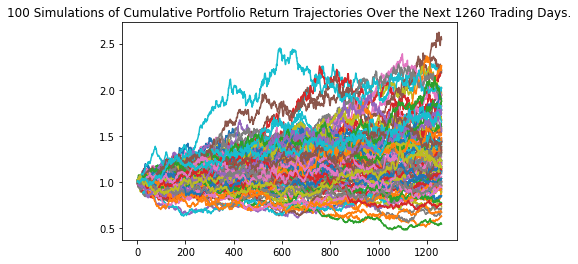

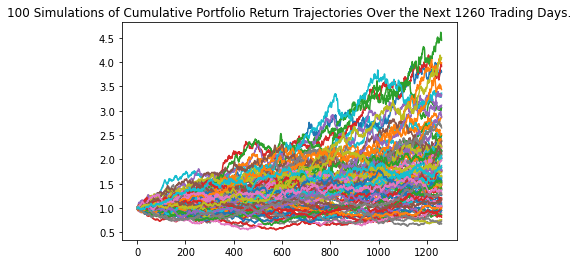

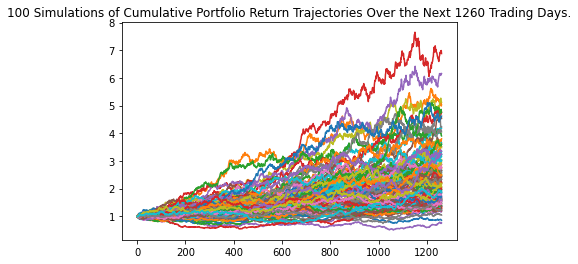

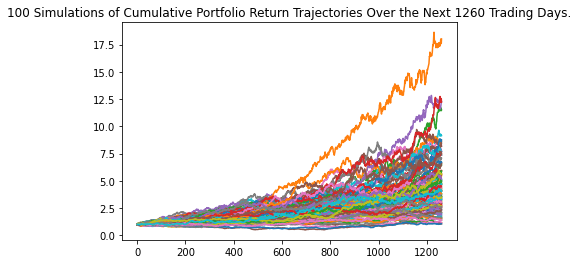

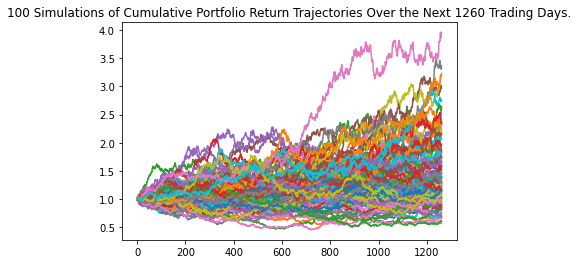

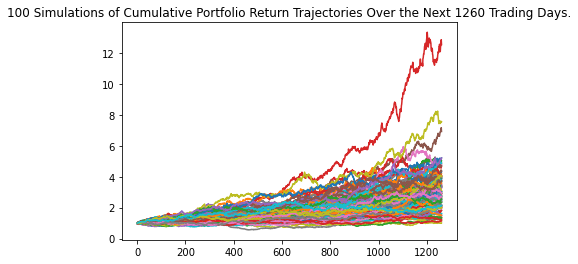

In [111]:
portfolio_a_plot=MC_portfolio_a.plot_simulation()

portfolio_b_plot=MC_portfolio_b.plot_simulation()

portfolio_c_plot=MC_portfolio_c.plot_simulation()

portfolio_d_plot=MC_portfolio_d.plot_simulation()

portfolio_e_plot=MC_portfolio_e.plot_simulation()

portfolio_f_plot=MC_portfolio_f.plot_simulation()

Summary Statistics for each portfolio

In [112]:
summary_statistics=pd.concat([MC_portfolio_a.summarize_cumulative_return(),MC_portfolio_b.summarize_cumulative_return(),
                              MC_portfolio_c.summarize_cumulative_return(),MC_portfolio_d.summarize_cumulative_return(),MC_portfolio_e.summarize_cumulative_return(),MC_portfolio_f.summarize_cumulative_return()],axis=1)

summary_statistics.set_axis(labels=["portfolio a", "portfolio b", "portfolio c", 
                                    "portfolio d","portfolio e","portfolio f"],axis=1, inplace=True)
summary_statistics

,portfolio a,portfolio b,portfolio c,portfolio d,portfolio e,portfolio f
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1.321496,1.843276,2.464165,4.515531,1.501208,3.126880
std,0.411392,0.794341,1.170792,2.809508,0.662793,1.511698
min,0.541421,0.675115,0.758397,1.047922,0.570951,1.010127
25%,1.008387,1.282340,1.566860,2.604911,1.037820,2.149176
50%,1.229490,1.697480,2.197570,3.921585,1.299422,2.909934
75%,1.558961,2.172622,3.028262,5.679842,1.793493,3.768348
max,2.544901,4.449326,6.881418,18.013201,3.938433,12.542911
95% CI Lower,0.670290,0.785361,1.107785,1.154487,0.671368,1.201016
95% CI Upper,2.210453,3.951720,5.076856,11.882787,3.211450,6.111555


**Results Dashboard**

Mean returns

In [118]:
mean_returns= pd.DataFrame({"5Y Mean Cumulative Returns":[summary_statistics.iloc[1,0], 
              summary_statistics.iloc[1,1],summary_statistics.iloc[1,2],
              summary_statistics.iloc[1,3],
              summary_statistics.iloc[1,4],
              summary_statistics.iloc[1,5]]}, 
              index=["portfolio a","portfolio b","portfolio c","portfolio d","portfolio e","portfolio f"])

mean_returns_plot= mean_returns.hvplot(kind="bar", title="Portfolios' Mean Cumulative Returns")

mean_returns_plot


:Bars   [index]   (5Y Mean Cumulative Returns)

Range as a measure of volatility

In [119]:
ranges= pd.DataFrame({"Max-Min Expected Cumulative Returns":[summary_statistics.iloc[7,0]-summary_statistics.iloc[3,0],
                     summary_statistics.iloc[7,1]-summary_statistics.iloc[3,1],
                     summary_statistics.iloc[7,2]-summary_statistics.iloc[3,2],
                     summary_statistics.iloc[7,3]-summary_statistics.iloc[3,3]]}, index=["portfolio a","portfolio b","portfolio c","portfolio d"])
ranges

,Max-Min Expected Cumulative Returns
portfolio a,2.00348
portfolio b,3.77421
portfolio c,6.12302
portfolio d,16.96528


In [66]:
ranges_plot=ranges.hvplot(kind="bar",title="Return Ranges")

ranges_plot

:Bars   [index]   (Max-Min Expected Cumulative Returns)

In [65]:
minimum= pd.DataFrame({"Minimum Expected Cumulative Returns over 5Y":[summary_statistics.iloc[3,0],
                     summary_statistics.iloc[3,1],summary_statistics.iloc[3,2],
                     summary_statistics.iloc[3,3]]}, index=["portfolio a","portfolio b","portfolio c", "portfolio d"])

minimum_plot=minimum.hvplot(kind="bar", title="Minimum Returns 5Y")

minimum_plot

:Bars   [index]   (Minimum Expected Cumulative Returns over 5Y)

In [69]:
tabs_2=pn.Tabs(("Results", pn.Row(mean_returns_plot, ranges_plot, minimum_plot)))

In [70]:
tabs_2

dashboard = pn.Column("Simulation Results", tabs_2)

In [71]:
dashboard.servable()

Column
    [0] Markdown(str)
    [1] Tabs
        [0] Row
            [0] HoloViews(Bars)
            [1] HoloViews(Bars)
            [2] HoloViews(Bars)